# Importing libraries

In [14]:
import tensorflow as tf
from tensorflow import keras
import os
import zipfile
import urllib
import PIL
import numpy as np
from keras.preprocessing import image
from tensorflow.keras.optimizers import RMSprop

# Downloading data and extracting data

In [2]:
urllib.request.urlretrieve("https://storage.googleapis.com/laurencemoroney-blog.appspot.com/happy-or-sad.zip",
                           filename="happy-or-sad.zip")
zip_ref = zipfile.ZipFile("happy-or-sad.zip", 'r')
zip_ref.extractall("happy-or-sad")
zip_ref.close()

# Setting directory for data

In [9]:
# Directory with our training horse pictures
train_happy_dir = os.path.join('happy-or-sad/happy')

# Directory with our training human pictures
train_sad_dir = os.path.join('happy-or-sad/sad')

#Directory for local test_data
test_local_dir = os.path.join('exercise_test_local_data')

# Printing names of files in dataset

In [10]:
train_happy_names = os.listdir(train_happy_dir)
print(train_happy_names[:10])

train_sad_names = os.listdir(train_sad_dir)
print(train_sad_names[:10])

['happy1-00.png', 'happy1-01.png', 'happy1-02.png', 'happy1-03.png', 'happy1-04.png', 'happy1-05.png', 'happy1-06.png', 'happy1-07.png', 'happy1-08.png', 'happy1-09.png']
['sad1-00.png', 'sad1-01.png', 'sad1-02.png', 'sad1-03.png', 'sad1-04.png', 'sad1-05.png', 'sad1-06.png', 'sad1-07.png', 'sad1-08.png', 'sad1-09.png']


# Plotting data

In [11]:
%matplotlib inline

import matplotlib.pyplot as plt
import matplotlib.image as mpimg

# Parameters for our graph; we'll output images in a 4x4 configuration
nrows = 4
ncols = 4

# Index for iterating over images
pic_index = 0

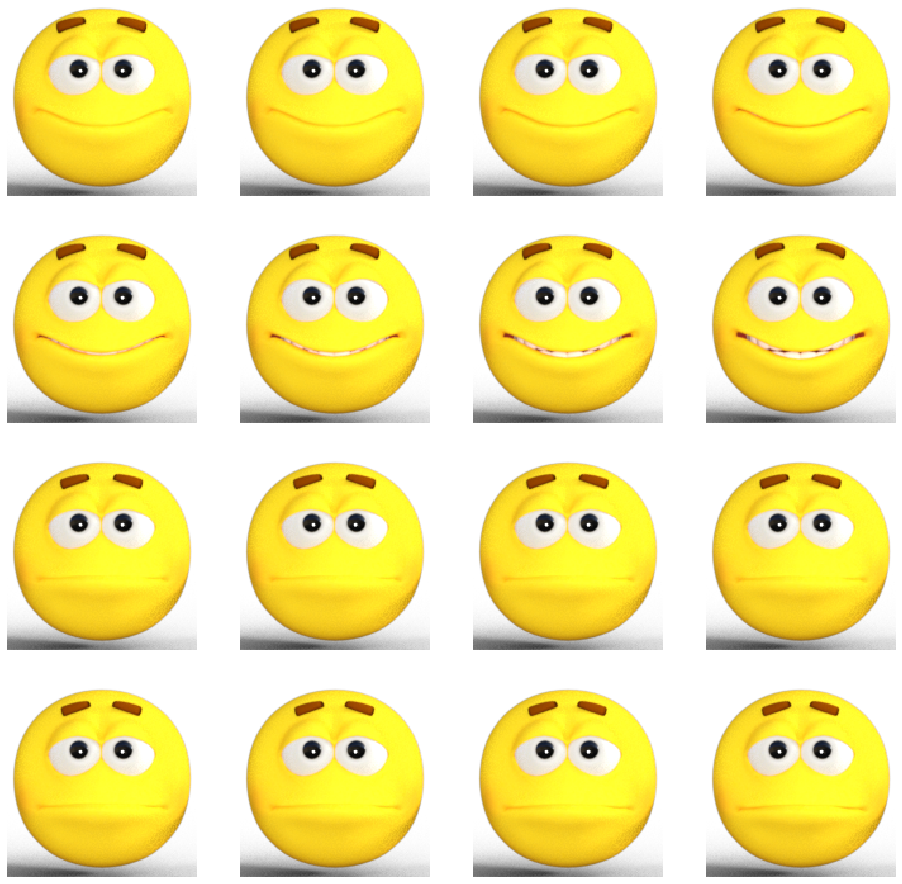

In [12]:
# Set up matplotlib fig, and size it to fit 4x4 pics
fig = plt.gcf()
fig.set_size_inches(ncols * 4, nrows * 4)

pic_index += 8
next_happy_pix = [os.path.join(train_happy_dir, fname) 
                for fname in train_happy_names[pic_index-8:pic_index]]
next_sad_pix = [os.path.join(train_sad_dir, fname) 
                for fname in train_sad_names[pic_index-8:pic_index]]

for i, img_path in enumerate(next_happy_pix+next_sad_pix):
  # Set up subplot; subplot indices start at 1
    sp = plt.subplot(nrows, ncols, i + 1)
    sp.axis('Off') # Don't show axes (or gridlines)

    img = mpimg.imread(img_path)
    plt.imshow(img)

plt.show()


# Creating Model

In [38]:
model = tf.keras.models.Sequential([
    # Note the input shape is the desired size of the image 150x150 with 3 bytes color
    # This is the first convolution
    tf.keras.layers.Conv2D(16, (3,3), activation='relu', input_shape=(150, 150, 3)),
    tf.keras.layers.MaxPooling2D(2, 2),
    # The second convolution
    tf.keras.layers.Conv2D(32, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    # The third convolution
    tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    # The fourth convolution
    #tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
    #tf.keras.layers.MaxPooling2D(2,2),
    # The fifth convolution
    #tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
    #tf.keras.layers.MaxPooling2D(2,2),
    # Flatten the results to feed into a DNN
    tf.keras.layers.Flatten(),
    # 512 neuron hidden layer
    tf.keras.layers.Dense(512, activation='relu'),
    # Only 1 output neuron. It will contain a value from 0-1 where 0 for 1 class ('horses') and 1 for the other ('humans')
    tf.keras.layers.Dense(1, activation='sigmoid')
])
model.summary()
model.compile(loss='binary_crossentropy',
              optimizer=RMSprop(lr=0.001),
              metrics=['accuracy'])

Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_16 (Conv2D)           (None, 148, 148, 16)      448       
_________________________________________________________________
max_pooling2d_16 (MaxPooling (None, 74, 74, 16)        0         
_________________________________________________________________
conv2d_17 (Conv2D)           (None, 72, 72, 32)        4640      
_________________________________________________________________
max_pooling2d_17 (MaxPooling (None, 36, 36, 32)        0         
_________________________________________________________________
conv2d_18 (Conv2D)           (None, 34, 34, 64)        18496     
_________________________________________________________________
max_pooling2d_18 (MaxPooling (None, 17, 17, 64)        0         
_________________________________________________________________
flatten_4 (Flatten)          (None, 18496)            

In [39]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# All images will be rescaled by 1./255
train_datagen = ImageDataGenerator(rescale=1/255)

# Flow training images in batches of 128 using train_datagen generator
train_generator = train_datagen.flow_from_directory(
        'happy-or-sad/',  # This is the source directory for training images
        target_size=(150, 150),  # All images will be resized to 300x300
        batch_size=10,
        # Since we use binary_crossentropy loss, we need binary labels
        class_mode='binary')

Found 80 images belonging to 2 classes.


In [40]:
class CustomCallback(keras.callbacks.Callback):

    def on_epoch_end(self, epoch, logs=None):
        keys = list(logs.keys())
        #print("\nEnd epoch {} of training; got log keys: {}\n".format(epoch, keys))
        #print(logs["accuracy"])
        if(logs["accuracy"]>0.999):
            print("\nAccuracy level reached\n")
            self.model.stop_training = True

In [41]:
history = model.fit(
      train_generator,
      epochs=15,
      steps_per_epoch=8,
      verbose=1,
      callbacks = [CustomCallback()]
      )

Train for 8 steps
Epoch 1/15
8/8 [==============================] - 1s 144ms/step - loss: 3.8620 - accuracy: 0.6625
Epoch 2/15
8/8 [==============================] - 0s 45ms/step - loss: 0.5484 - accuracy: 0.7500
Epoch 3/15
8/8 [==============================] - 0s 42ms/step - loss: 0.1719 - accuracy: 0.9500
Epoch 4/15
8/8 [==============================] - 0s 42ms/step - loss: 0.3242 - accuracy: 0.8625
Epoch 5/15
8/8 [==============================] - 0s 42ms/step - loss: 0.1230 - accuracy: 0.9125
Epoch 6/15
8/8 [==============================] - 0s 43ms/step - loss: 0.1358 - accuracy: 0.9500
Epoch 7/15
8/8 [==============================] - 0s 42ms/step - loss: 0.1790 - accuracy: 0.9500
Epoch 8/15
8/8 [==============================] - 0s 42ms/step - loss: 0.0599 - accuracy: 0.9750
Epoch 9/15
8/8 [==============================] - 0s 41ms/step - loss: 0.4710 - accuracy: 0.8125
Epoch 10/15
8/8 [==============================] - 0s 45ms/step - loss: 0.1558 - accuracy: 0.9375
Epoch 11/1

[0.]
happy1-00.png is a happy
[1.]
sad2-17.png is sad
[1.]
test_img1.jpg is sad
[1.]
test_img2.jpg is sad
[1.]
test_img3.jpg is sad


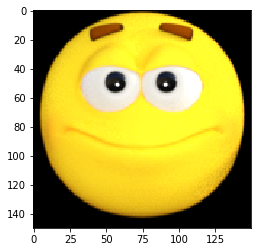

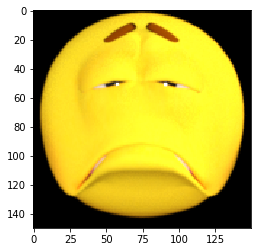

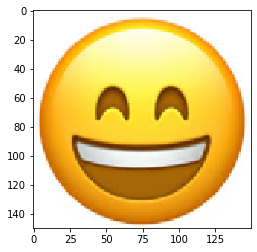

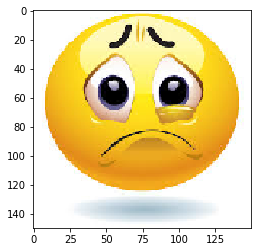

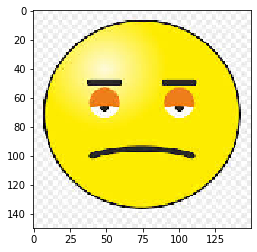

In [49]:
test_local_data = os.listdir(test_local_dir)

for fn in test_local_data:
 
  # predicting images
    path = 'exercise_test_local_data/' + fn
    img = image.load_img(path, target_size=(150, 150))
    plt.figure()
    plt.imshow(np.asarray(img))
    x = image.img_to_array(img)
    x = np.expand_dims(x, axis=0)
    images = np.vstack([x])
    classes = model.predict(images, batch_size=10)
    print(classes[0])
    if classes[0]>0.5:
        print(fn + " is sad")
    else:
        print(fn + " is a happy")